In [65]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

In [3]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

#     #### load data
# with open(in_path +'M194_M220_ACA_bin4.pkl', 'rb') as f:
#     aca_bin = pickle.load(f)   

# #### load data
# with open(in_path +'M194_M220_ACA_countN4.pkl', 'rb') as f:
#     aca_countN = pickle.load(f)

# Data Processing

In [4]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]
omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median

# countN processing
omc_cleanN = [clean_up_data(df) for df in omc_countN]
omc_typeN = [sort_by_celltype(df) for df in omc_cleanN]
omc_preprocessN = dfs_preprocess_counts(omc_typeN) # normalize by dataset median



# Dot Plots

In [10]:
# IT
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_preprocessN]
plot_df = dfs_to_total_BCs(omc_it, cell_type="IT")

plot_df

,area,BC_total,mice,species,dataset
0,OMCc,10096.546252,MMM1,MMus,M194
1,AUD,47.175395,MMM1,MMus,M194
2,STR,16768.821242,MMM1,MMus,M194
0,OMCc,17428.161254,MMF2,MMus,M194
1,AUD,521.637053,MMF2,MMus,M194
2,STR,30415.602449,MMF2,MMus,M194
0,OMCc,15602.020323,MMF3,MMus,M194
1,AUD,183.978712,MMF3,MMus,M194
2,STR,25893.325058,MMF3,MMus,M194
0,OMCc,619.085230,STM1,STeg,M194


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


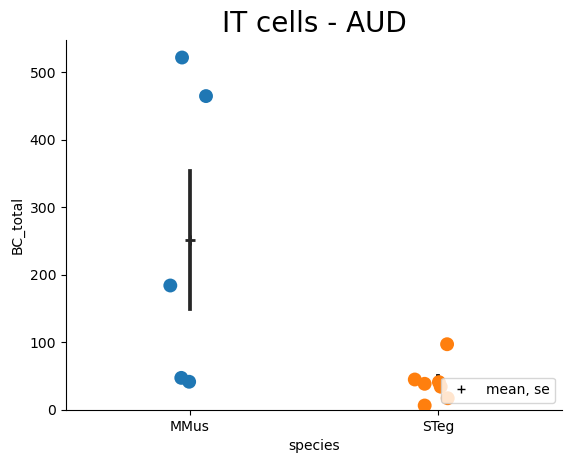

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


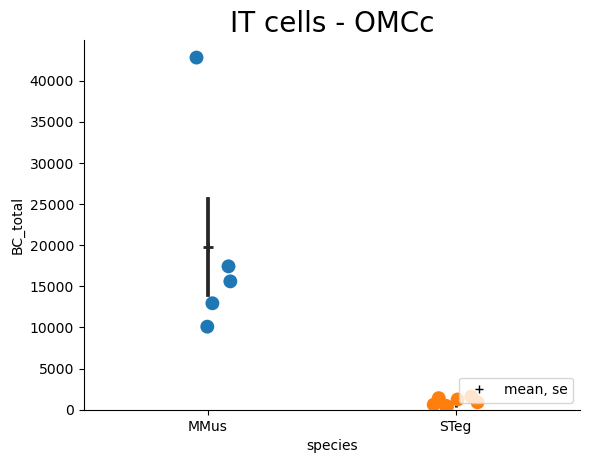

In [11]:

# AUD
area_proportion_dot_plot(plot_df, "AUD", title="IT cells - AUD", to_plot="BC_total")
# plt.savefig(out_path+"OMC_AUD_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# OMCc
area_proportion_dot_plot(plot_df, "OMCc", title="IT cells - OMCc", to_plot="BC_total")
# plt.savefig(out_path+"OMC_OMCc_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


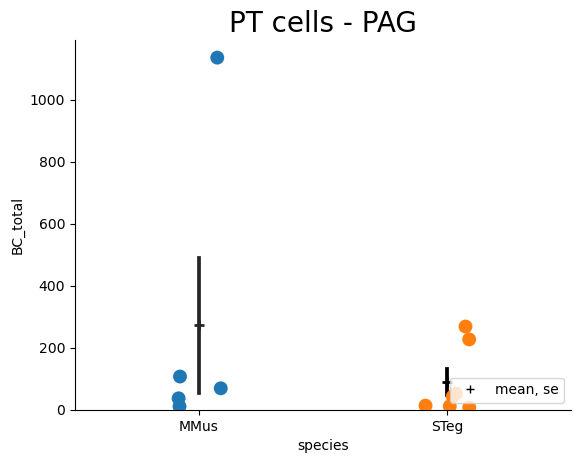

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


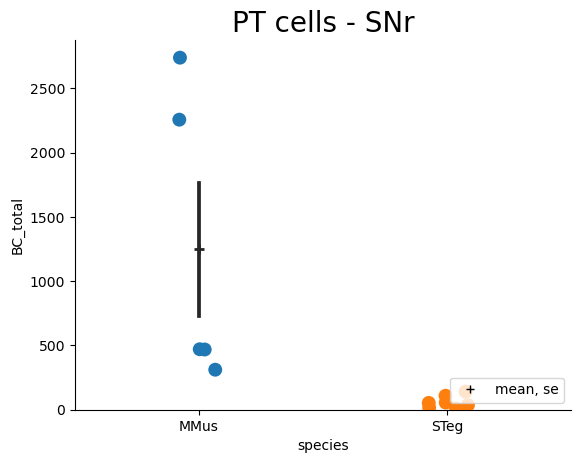

In [12]:

omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_preprocessN]
plot_df = dfs_to_total_BCs(omc_pt, cell_type="PT")

# PAG
area_proportion_dot_plot(plot_df, "PAG", title="PT cells - PAG", to_plot="BC_total")
# plt.savefig(out_path+"OMC_PAG_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
area_proportion_dot_plot(plot_df, "SNr", title="PT cells - SNr", to_plot="BC_total")
# plt.savefig(out_path+"OMC_SNr_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

## Add down Sampled lab mouse

In [56]:
# processing
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_preprocessN]
omc_it_prop = dfs_to_total_BCs(omc_it, cell_type="IT")

mm_it_sim = sample_mm_all(omc_it)
mm_it_sim_prop = dfs_to_total_BCs(mm_it_sim, cell_type="IT")
mm_it_sim_prop['species'] = "MMus_down_sampled"


omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_preprocessN]
omc_pt_prop = dfs_to_total_BCs(omc_pt, cell_type="PT")

mm_pt_sim = sample_mm_all(omc_pt)
mm_pt_sim_prop = dfs_to_total_BCs(mm_pt_sim, cell_type="PT")
mm_pt_sim_prop['species'] = "MMus_down_sampled"


plot_it = pd.concat([omc_it_prop, mm_it_sim_prop]).reset_index(drop=True)
plot_pt = pd.concat([omc_pt_prop, mm_pt_sim_prop]).reset_index(drop=True)

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

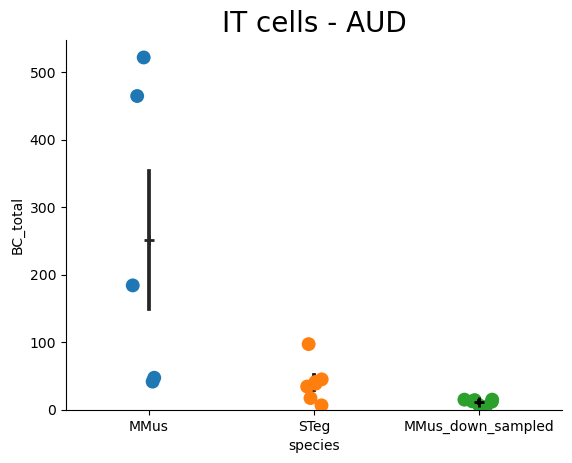

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

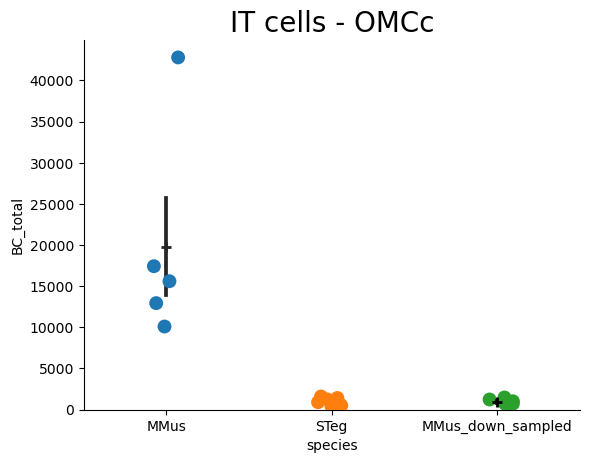

In [22]:
# AUD
area_proportion_dot_plot(plot_it.reset_index(drop=True), "AUD", title="IT cells - AUD", add_legend=False, to_plot="BC_total")
# plt.savefig(out_path+"OMC_AUD_mmdown_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# OMCc
area_proportion_dot_plot(plot_it, "OMCc", title="IT cells - OMCc", add_legend=False, to_plot="BC_total")
# plt.savefig(out_path+"OMC_OMCc_mmdown_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

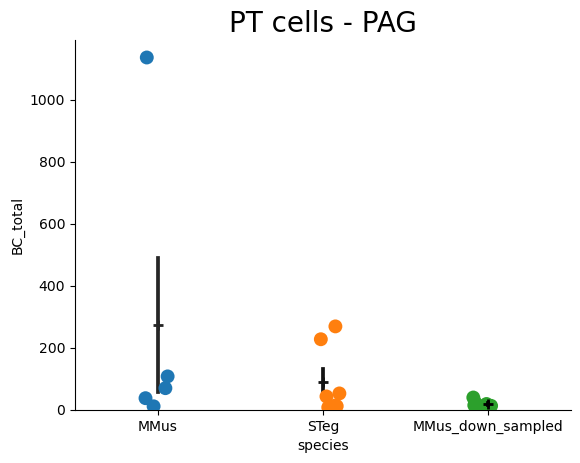

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

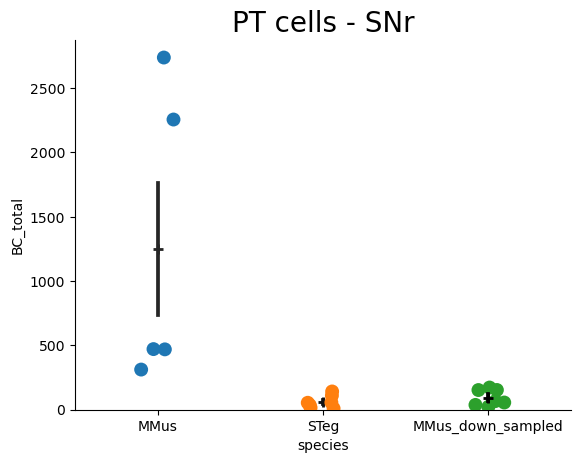

In [24]:
# PAG
area_proportion_dot_plot(plot_pt, "PAG", title="PT cells - PAG", add_legend=False, to_plot="BC_total")
# plt.savefig(out_path+"OMC_PAG_mmdown_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
area_proportion_dot_plot(plot_pt, "SNr", title="PT cells - SNr", add_legend=False, to_plot="BC_total")
# plt.savefig(out_path+"OMC_SNr_mmdown_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# Estimated error

In [14]:
# processing
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
omc_it_prop = dfs_to_proportions(omc_it, cell_type="IT")

mm_it_sim = sample_mm_all(omc_it)
mm_it_sim_prop = dfs_to_proportions(mm_it_sim, cell_type="IT")
mm_it_sim_prop['species'] = "MMus_down_sampled"


omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
omc_pt_prop = dfs_to_proportions(omc_pt, cell_type="PT")

mm_pt_sim = sample_mm_all(omc_pt)
mm_pt_sim_prop = dfs_to_proportions(mm_pt_sim, cell_type="PT")
mm_pt_sim_prop['species'] = "MMus_down_sampled"


sim_it_prop = pd.concat([omc_it_prop, mm_it_sim_prop])
sim_pt_prop = pd.concat([omc_pt_prop, mm_pt_sim_prop])

sim_it_prop['type'] = "IT"
sim_pt_prop['type'] = "PT"

# get rid of STR from pt
sim_pt_prop = sim_pt_prop[sim_pt_prop['area'] != "STR"]

sim_prop = pd.concat([sim_it_prop, sim_pt_prop]).reset_index(drop=True)
sim_prop

,area,proportion,mice,species,dataset,type
0,OMCc,0.676602,MMM1,MMus,M194,IT
1,AUD,0.014118,MMM1,MMus,M194,IT
2,STR,0.863159,MMM1,MMus,M194,IT
3,OMCc,0.692644,MMF2,MMus,M194,IT
4,AUD,0.059234,MMF2,MMus,M194,IT
...,...,...,...,...,...,...
204,SNr,0.532407,MMM4,MMus_down_sampled,M220,PT
205,SCm,0.495370,MMM4,MMus_down_sampled,M220,PT
206,PG,0.625000,MMM4,MMus_down_sampled,M220,PT
207,PAG,0.203704,MMM4,MMus_down_sampled,M220,PT


## MMus_downsample x STeg

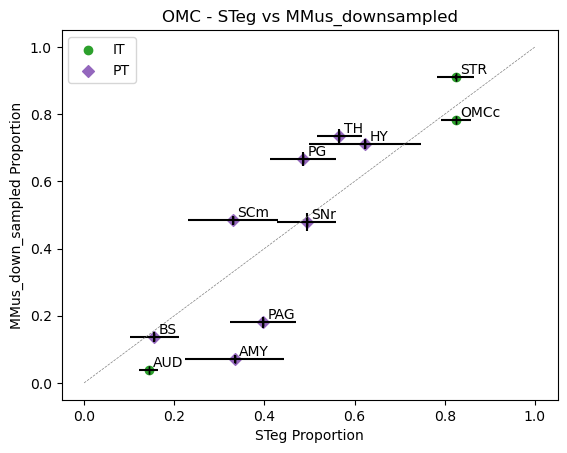

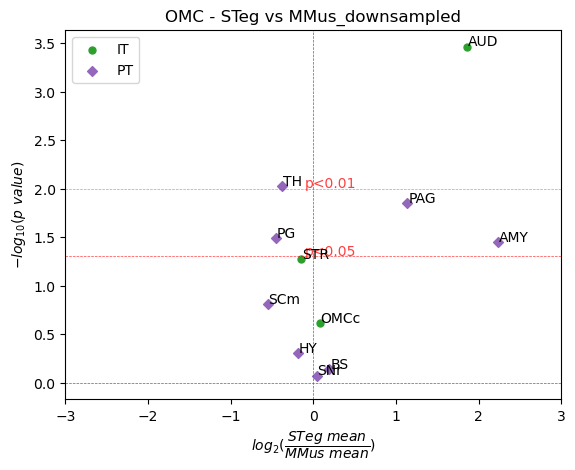

In [15]:
plot = stvmm_calc_stats(sim_prop, species=["STeg", "MMus", "MMus_down_sampled"])


# scatter
stvmm_area_scatter_type(plot, title="OMC - STeg vs MMus_downsampled", x="STeg", y="MMus_down_sampled")
plt.savefig(out_path+"OMC_scatter_mmdown_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

# volcano
plot = stvmm_calc_ttest(sim_prop, sp1="MMus_down_sampled", sp2="STeg")
plot_volcano(plot, title="OMC - STeg vs MMus_downsampled", shape='type', xlim=(-3,3))
plt.savefig(out_path+"OMC_volcano_mmdown_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

# Intra vs. Inter comparisons

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

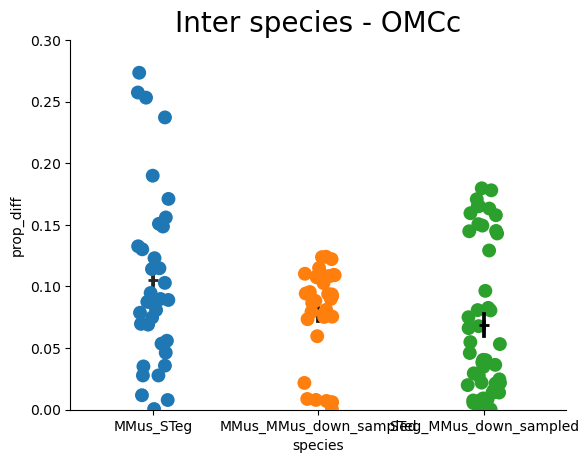

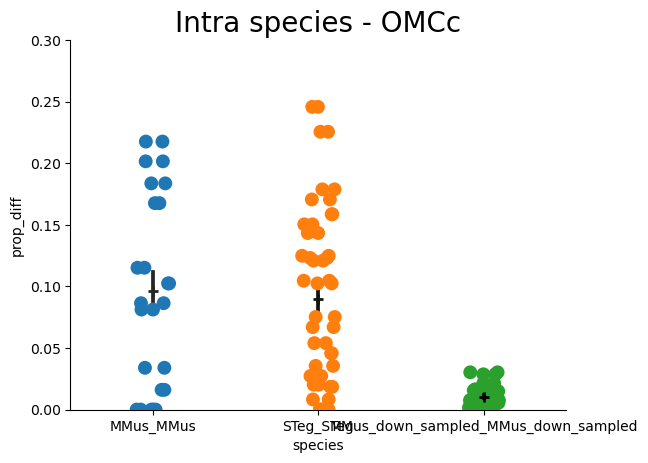

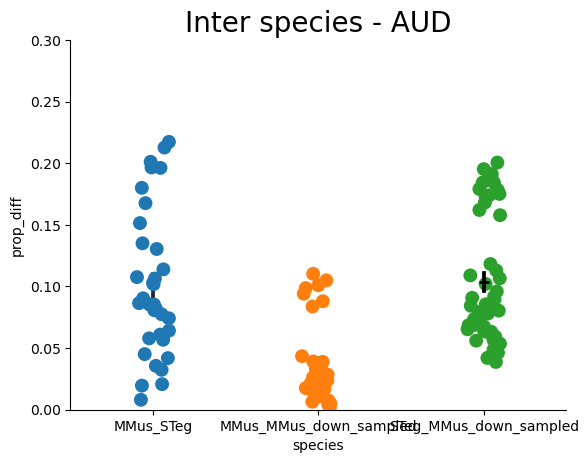

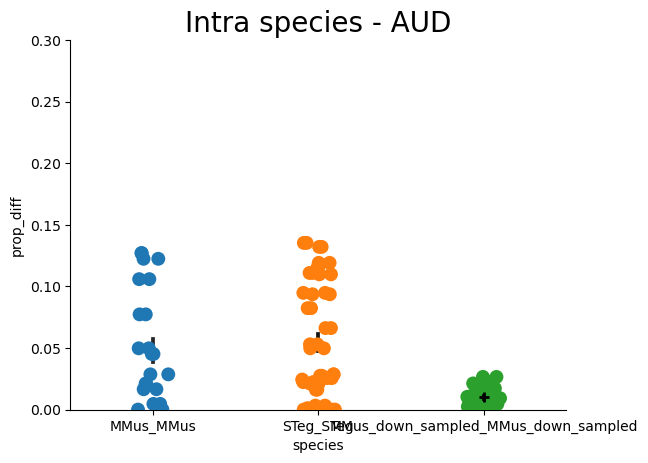

In [16]:
d1 = proportion_comparisons(plot_it, species1="MMus", species2="STeg", label="inter")
d2 = proportion_comparisons(plot_it, species1="MMus", species2="MMus_down_sampled", label="inter")
d3 = proportion_comparisons(plot_it, species1="STeg", species2="MMus_down_sampled", label="inter")
d4 = proportion_comparisons(plot_it, species1="MMus", species2="MMus", label="intra")
d5 = proportion_comparisons(plot_it, species1="STeg", species2="STeg", label="intra")
d6 = proportion_comparisons(plot_it, species1="MMus_down_sampled", species2="MMus_down_sampled", label="intra")

result_it = pd.concat([d1, d2, d3, d4, d5, d6])

inter_it = result_it[result_it['label']=="inter"]
intra_it = result_it[result_it['label']=="intra"]



f1 = area_proportion_dot_plot(inter_it, "OMCc", title="Inter species - OMCc", to_plot="prop_diff", ylim=(0,0.3), add_legend=False)
f3 = area_proportion_dot_plot(intra_it, "OMCc", title="Intra species - OMCc", to_plot="prop_diff", ylim=(0,0.3), add_legend=False)
f2 = area_proportion_dot_plot(inter_it, "AUD", title="Inter species - AUD", to_plot="prop_diff", ylim=(0,0.3), add_legend=False)
f4 = area_proportion_dot_plot(intra_it, "AUD", title="Intra species - AUD", to_plot="prop_diff", ylim=(0,0.3), add_legend=False)

plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

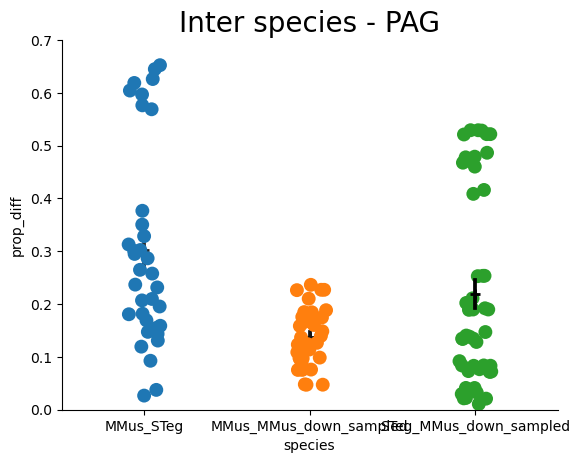

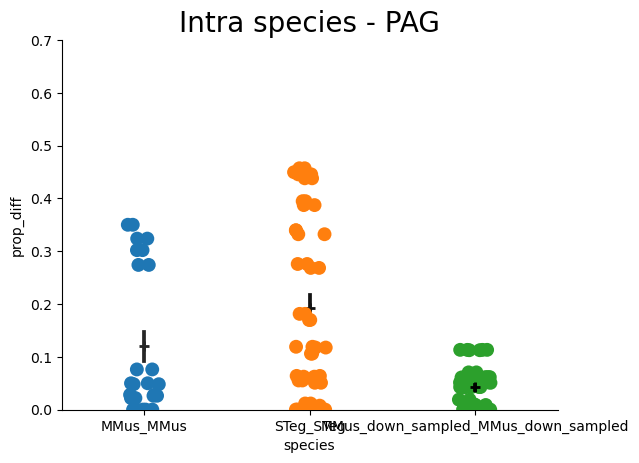

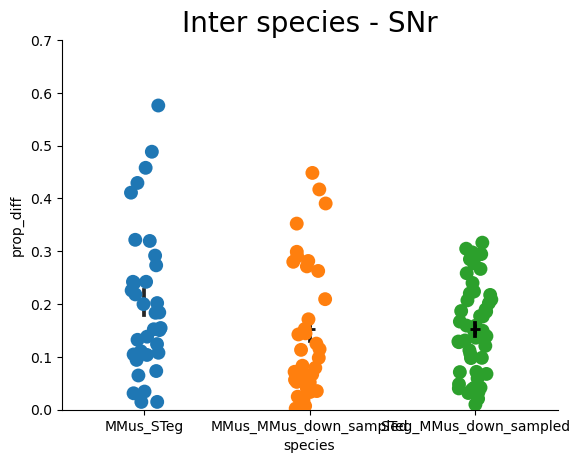

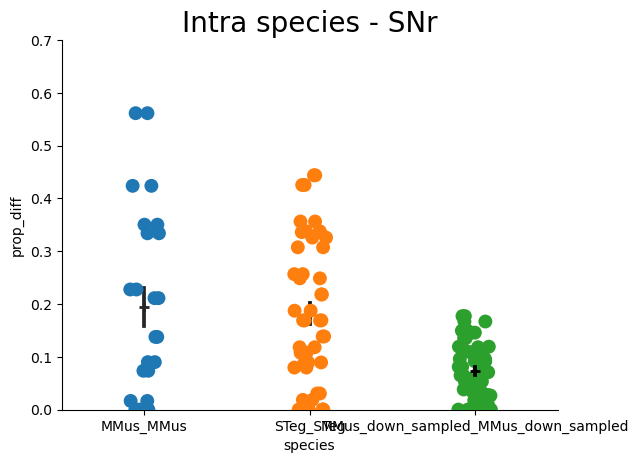

In [18]:
d1 = proportion_comparisons(plot_pt, species1="MMus", species2="STeg", label="inter")
d2 = proportion_comparisons(plot_pt, species1="MMus", species2="MMus_down_sampled", label="inter")
d3 = proportion_comparisons(plot_pt, species1="STeg", species2="MMus_down_sampled", label="inter")
d4 = proportion_comparisons(plot_pt, species1="MMus", species2="MMus", label="intra")
d5 = proportion_comparisons(plot_pt, species1="STeg", species2="STeg", label="intra")
d6 = proportion_comparisons(plot_pt, species1="MMus_down_sampled", species2="MMus_down_sampled", label="intra")

result_pt = pd.concat([d1, d2, d3, d4, d5, d6])

inter_pt = result_pt[result_pt['label']=="inter"]
intra_pt = result_pt[result_pt['label']=="intra"]



f1 = area_proportion_dot_plot(inter_pt, "PAG", title="Inter species - PAG", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)
f3 = area_proportion_dot_plot(intra_pt, "PAG", title="Intra species - PAG", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)
f2 = area_proportion_dot_plot(inter_pt, "SNr", title="Inter species - SNr", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)
f4 = area_proportion_dot_plot(intra_pt, "SNr", title="Intra species - SNr", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)

plt.show()


/var/folders/l2/gvq0gkm95b1fbrlls4tsq2wr0000gp/T/ipykernel_7160/1105676981.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_means = result.groupby(['label', 'area']).mean().reset_index()


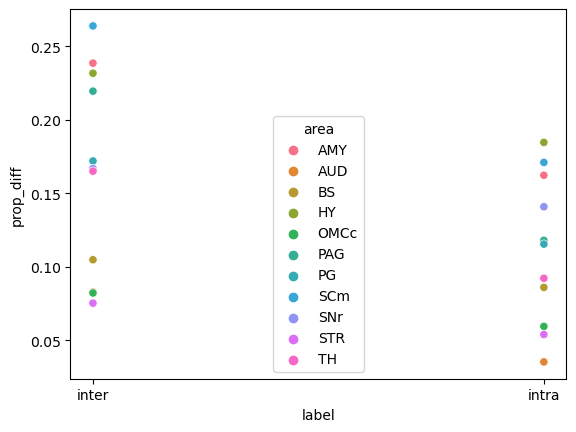

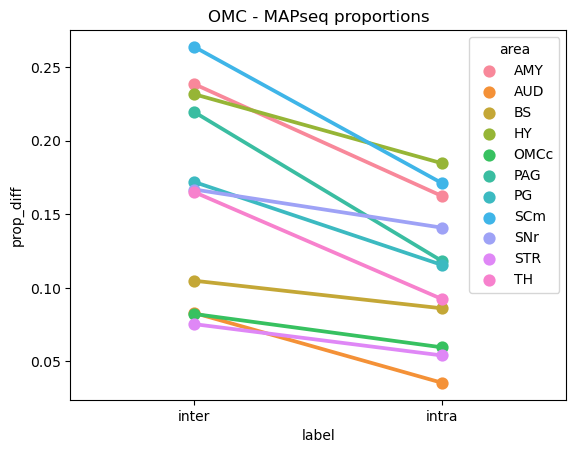

In [39]:
# drop str in result_pt so no repeat areas b/w it and pt
result_pt = result_pt[result_pt['area']!="STR"]

result = pd.concat([result_it, result_pt])

# inter = result[result['label']=="inter"]
# intra = result[result['label']=="intra"]

result_means = result.groupby(['label', 'area']).mean().reset_index()
result_means

sns.scatterplot(result_means, x='label', y="prop_diff", hue="area")
# plt.scatter(result_means['label'], result_means['prop_diff'])
plt.show()

sns.pointplot(result_means, x="label", y="prop_diff", hue="area")
plt.title("OMC - MAPseq proportions")
plt.show()

# Scatterplots

In [30]:
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_preprocessN]
omc_it_prop = dfs_to_total_BCs(omc_it, cell_type="IT")
omc_pt = [df[df["type"]=="PT"].drop(["type"], axis=1) for df in omc_preprocessN]
omc_pt_prop = dfs_to_total_BCs(omc_pt, cell_type="PT")
omc_pt_prop

,area,BC_total,mice,species,dataset
0,TH,1570.762916,MMM1,MMus,M194
1,HY,1056.253621,MMM1,MMus,M194
2,AMY,44.506813,MMM1,MMus,M194
3,SNr,470.464558,MMM1,MMus,M194
4,SCm,204.752569,MMM1,MMus,M194
...,...,...,...,...,...
3,SNr,140.892469,STM7,STeg,M220
4,SCm,134.364220,STM7,STeg,M220
5,PG,132.554878,STM7,STeg,M220
6,PAG,226.877879,STM7,STeg,M220


In [31]:
# combine IT and PT
omc_it_prop['type'] = "IT"
omc_pt_prop['type'] = "PT"

sp_stats_it = stvmm_calc_stats(omc_it_prop, to_plot="BC_total")
sp_stats_pt = stvmm_calc_stats(omc_pt_prop, to_plot="BC_total")

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])
sp_stats

,area,mean,count,std,sem,ci95,species,type
0,AUD,39.775573,7,28.804874,10.887219,21.338950,STeg,IT
1,OMCc,946.066686,7,477.188713,180.360381,353.506346,STeg,IT
2,STR,1323.436824,7,588.566127,222.457086,436.015889,STeg,IT
0,AUD,251.745964,5,228.468055,102.174020,200.261080,MMus,IT
1,OMCc,19773.635130,5,13168.198797,5888.997530,11542.435159,MMus,IT
2,STR,29984.727545,5,18669.248431,8349.141716,16364.317763,MMus,IT
0,AMY,35.150354,7,45.112598,17.050960,33.419881,STeg,PT
1,BS,57.612161,7,76.538107,28.928685,56.700223,STeg,PT
2,HY,69.895901,7,42.584813,16.095546,31.547271,STeg,PT
3,PAG,88.746093,7,110.460282,41.750062,81.830122,STeg,PT


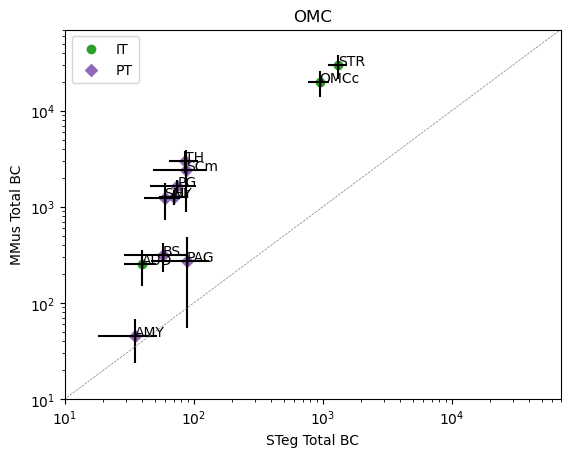

In [45]:

stvmm_area_scatter_type(sp_stats, title="OMC", log=True, axis_label="Total BC")
plt.xlim(10,70000)
plt.ylim(10,70000)

# plot unity line
x = np.linspace(0,70000, 5)
y = x
plt.plot(x, y, color='grey', linestyle="--", linewidth=0.5)


# plt.savefig(out_path+"OMC_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

## volcano plot

In [49]:
omc_prop = pd.concat([omc_it_prop, omc_pt_prop])
omc_prop

,area,BC_total,mice,species,dataset,type
0,OMCc,10096.546252,MMM1,MMus,M194,IT
1,AUD,47.175395,MMM1,MMus,M194,IT
2,STR,16768.821242,MMM1,MMus,M194,IT
0,OMCc,17428.161254,MMF2,MMus,M194,IT
1,AUD,521.637053,MMF2,MMus,M194,IT
...,...,...,...,...,...,...
3,SNr,140.892469,STM7,STeg,M220,PT
4,SCm,134.364220,STM7,STeg,M220,PT
5,PG,132.554878,STM7,STeg,M220,PT
6,PAG,226.877879,STM7,STeg,M220,PT


In [53]:
# omc_it_prop['type'] = "IT"
# omc_pt_prop['type'] = "PT"

omc_prop = pd.concat([omc_it_prop, omc_pt_prop])
plot = stvmm_calc_ttest(omc_prop, to_plot="BC_total")

plot

,area,p-value,MMus_mean,STeg_mean,fold_change,log2_fc,nlog10_p,type,p<0.05
0,AUD,0.032768,251.745964,39.775573,0.157999,-2.662014,1.484552,IT,True
1,OMCc,0.003176,19773.635130,946.066686,0.047845,-4.385492,2.498181,IT,True
2,STR,0.002004,29984.727545,1323.436824,0.044137,-4.501867,2.698114,IT,True
3,AMY,0.710470,45.594459,35.150354,0.770935,-0.375319,0.148454,PT,False
4,BS,0.021913,314.393478,57.612161,0.183249,-2.448126,1.659301,PT,True
5,HY,0.000079,1272.802377,69.895901,0.054915,-4.186657,4.099646,PT,True
6,PAG,0.348665,271.837596,88.746093,0.326467,-1.614989,0.457592,PT,False
7,PG,0.000037,1652.913462,74.766448,0.045233,-4.466476,4.435392,PT,True
8,SCm,0.095121,2404.748462,86.930030,0.036149,-4.789888,1.021726,PT,False
9,SNr,0.019472,1248.921100,59.520820,0.047658,-4.391144,1.710582,PT,True


(-6.0, 2.0)

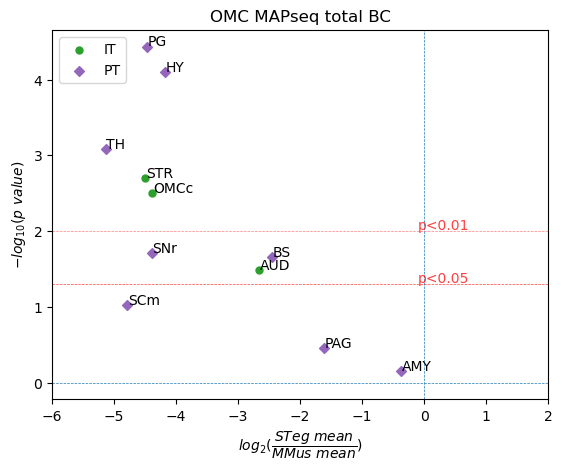

In [55]:

plot_volcano(plot, title="OMC MAPseq total BC", shape="type")
plt.xlim(-6,2)


# plt.savefig(out_path+"OMC_volcano_mapseq_type.svg", dpi=300, bbox_inches="tight")


## scatter/volcano for downsample MMus vs. Steg

In [68]:
plot_it['type'] = "IT"
plot_pt['type'] = "PT"

sp_stats_it = stvmm_calc_stats(plot_it, to_plot="BC_total", species=["STeg", "MMus_down_sampled"])
sp_stats_pt = stvmm_calc_stats(plot_pt, to_plot="BC_total", species=["STeg", "MMus_down_sampled"])

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])
sp_stats

,area,mean,count,std,sem,ci95,species,type
0,AUD,39.775573,7,28.804874,10.887219,21.338950,STeg,IT
1,OMCc,946.066686,7,477.188713,180.360381,353.506346,STeg,IT
2,STR,1323.436824,7,588.566127,222.457086,436.015889,STeg,IT
0,AUD,11.083527,7,4.361605,1.648532,3.231122,MMus_down_sampled,IT
1,OMCc,968.555204,7,307.183476,116.104441,227.564704,MMus_down_sampled,IT
2,STR,1450.113787,7,409.134265,154.638217,303.090905,MMus_down_sampled,IT
0,AMY,35.150354,7,45.112598,17.050960,33.419881,STeg,PT
1,BS,57.612161,7,76.538107,28.928685,56.700223,STeg,PT
2,HY,69.895901,7,42.584813,16.095546,31.547271,STeg,PT
3,PAG,88.746093,7,110.460282,41.750062,81.830122,STeg,PT


(11, 9)
(11, 9)


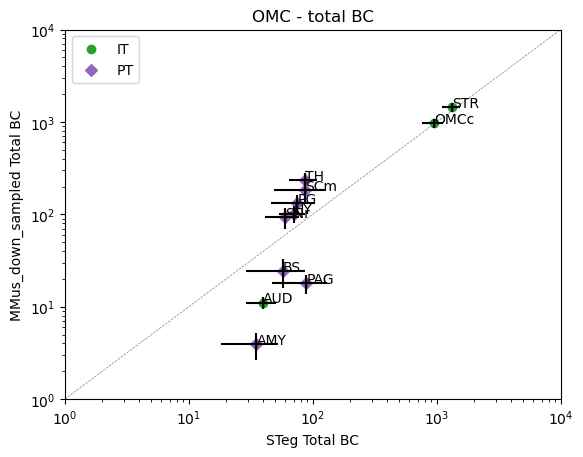

In [84]:

stvmm_area_scatter_type(sp_stats, title="OMC - total BC", log=True, axis_label="Total BC",
                        x="STeg", y="MMus_down_sampled")
plt.xlim(1,10000)
plt.ylim(1,10000)

# plot unity line
x = np.linspace(1,10000, 5)
y = x
plt.plot(x, y, color='grey', linestyle="--", linewidth=0.5)


# plt.savefig(out_path+"OMC_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

In [81]:

# omc_prop = pd.concat([omc_it_prop, omc_pt_prop])
plot_it['type'] = "IT"
plot_pt['type'] = "PT"
total = pd.concat([plot_it, plot_pt])

plot = stvmm_calc_ttest(total, to_plot="BC_total", sp1="STeg", sp2="MMus_down_sampled")

plot

,area,p-value,STeg_mean,MMus_down_sampled_mean,fold_change,log2_fc,nlog10_p,type,p<0.05
0,AUD,0.022984,39.775573,11.083527,0.278652,-1.843466,1.638580,IT,True
1,OMCc,0.918233,946.066686,968.555204,1.023771,0.033892,0.037047,IT,False
2,STR,0.648467,1323.436824,1450.113787,1.095718,0.131877,0.188112,IT,False
3,AMY,0.092687,35.150354,3.916227,0.111414,-3.166003,1.032981,PT,False
4,BS,0.288560,57.612161,24.171325,0.419552,-1.253077,0.539764,PT,False
5,HY,0.241629,69.895901,101.793143,1.456354,0.542361,0.616852,PT,False
6,PAG,0.116998,88.746093,17.888519,0.201570,-2.310650,0.931823,PT,False
7,PG,0.186321,74.766448,131.546954,1.759438,0.815115,0.729738,PT,False
8,SCm,0.147994,86.930030,182.556814,2.100043,1.070419,0.829756,PT,False
9,SNr,0.278870,59.520820,93.597007,1.572509,0.653068,0.554599,PT,False


(-4.0, 4.0)

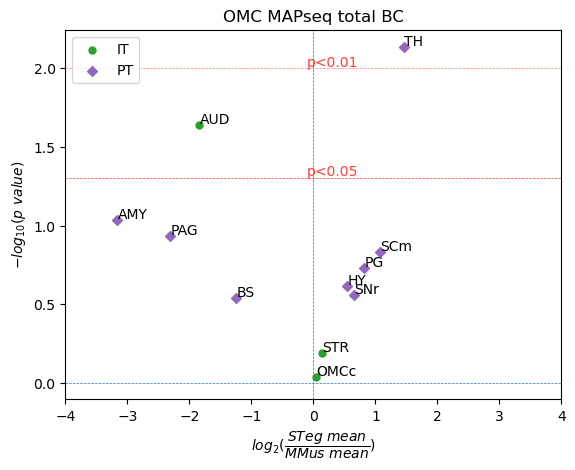

In [85]:

plot_volcano(plot, title="OMC MAPseq total BC", shape="type")
plt.xlim(-4,4)


# plt.savefig(out_path+"OMC_volcano_mapseq_type.svg", dpi=300, bbox_inches="tight")
